In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# One of the supplied CSV data file is the raw_data directory
application_details = pd.read_csv(r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-2\Credit Card Data/application_record.csv')

In [3]:
application_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
#FLAG_OWN_REALTY:Is there a property
application_details.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
# Other supplied CSV data file is the raw_data directory. Both CSV file connected by ID.
credit_details=pd.read_csv(r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-2\Credit Card Data/credit_record.csv')

In [6]:
credit_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
#MONTHS_BALANCE:The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.
#STATUS:0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 
#5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month
credit_details.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
# To separately identify the count of X,C,0,1,2,3,4 & 5 for each ids.
for status in ['X', 'C', '0', '1', '2', '3', '4', '5']:
    col_name = f'No.of {status}'
    credit_details[col_name] = credit_details.groupby('ID')['STATUS'].transform(lambda x: (x == status).sum())

In [9]:
credit_details.head(10)

,ID,MONTHS_BALANCE,STATUS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5
0,5001711,0,X,1,0,3,0,0,0,0,0
1,5001711,-1,0,1,0,3,0,0,0,0,0
2,5001711,-2,0,1,0,3,0,0,0,0,0
3,5001711,-3,0,1,0,3,0,0,0,0,0
4,5001712,0,C,0,9,10,0,0,0,0,0
5,5001712,-1,C,0,9,10,0,0,0,0,0
6,5001712,-2,C,0,9,10,0,0,0,0,0
7,5001712,-3,C,0,9,10,0,0,0,0,0
8,5001712,-4,C,0,9,10,0,0,0,0,0
9,5001712,-5,C,0,9,10,0,0,0,0,0


In [10]:
#Drop the status column
credit_details = credit_details.drop(['STATUS'], axis=1)

In [11]:
credit_details.head(10)

,ID,MONTHS_BALANCE,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5
0,5001711,0,1,0,3,0,0,0,0,0
1,5001711,-1,1,0,3,0,0,0,0,0
2,5001711,-2,1,0,3,0,0,0,0,0
3,5001711,-3,1,0,3,0,0,0,0,0
4,5001712,0,0,9,10,0,0,0,0,0
5,5001712,-1,0,9,10,0,0,0,0,0
6,5001712,-2,0,9,10,0,0,0,0,0
7,5001712,-3,0,9,10,0,0,0,0,0
8,5001712,-4,0,9,10,0,0,0,0,0
9,5001712,-5,0,9,10,0,0,0,0,0


In [12]:
#Drop the months_balance column
credit_details = credit_details.drop(['MONTHS_BALANCE'], axis=1)

In [13]:
credit_details.head()

,ID,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5
0,5001711,1,0,3,0,0,0,0,0
1,5001711,1,0,3,0,0,0,0,0
2,5001711,1,0,3,0,0,0,0,0
3,5001711,1,0,3,0,0,0,0,0
4,5001712,0,9,10,0,0,0,0,0


In [14]:
#To drop the duplicate ids
credit_details = credit_details.drop_duplicates(subset='ID').reset_index(drop=True)

In [15]:
credit_details.head()

,ID,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5
0,5001711,1,0,3,0,0,0,0,0
1,5001712,0,9,10,0,0,0,0,0
2,5001713,22,0,0,0,0,0,0,0
3,5001714,15,0,0,0,0,0,0,0
4,5001715,60,0,0,0,0,0,0,0


In [16]:
#Create a new column 'STATUS'; to identify customers as good or bad. BAD CUSTOMERS is having not equal to 0 values for any columns in
#'No.of 0', 'No.of 1', 'No.of 2', 'No.of 3', 'No.of 4', 'No.of 5'. Otherwise considered as GOOD CUSTOMER.
credit_details['STATUS'] = np.where(
    (credit_details[['No.of 0', 'No.of 1', 'No.of 2', 'No.of 3', 'No.of 4', 'No.of 5']] != 0).any(axis=1),
    'BAD CUSTOMER',
    'GOOD CUSTOMER'
)

In [17]:
credit_details.head(10)

,ID,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
0,5001711,1,0,3,0,0,0,0,0,BAD CUSTOMER
1,5001712,0,9,10,0,0,0,0,0,BAD CUSTOMER
2,5001713,22,0,0,0,0,0,0,0,GOOD CUSTOMER
3,5001714,15,0,0,0,0,0,0,0,GOOD CUSTOMER
4,5001715,60,0,0,0,0,0,0,0,GOOD CUSTOMER
5,5001717,0,5,17,0,0,0,0,0,BAD CUSTOMER
6,5001718,10,3,24,2,0,0,0,0,BAD CUSTOMER
7,5001719,0,41,2,0,0,0,0,0,BAD CUSTOMER
8,5001720,0,0,29,7,0,0,0,0,BAD CUSTOMER
9,5001723,23,0,8,0,0,0,0,0,BAD CUSTOMER


In [18]:
#Joining both dataframes.
df_applicant = application_details.merge(
    credit_details,
    on='ID',          # common column name in both DataFrames
    how='left'        # type of join: left join
)


In [19]:
df_applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2.0,1.0,13.0,1.0,1.0,0.0,0.0,0.0,0.0,BAD CUSTOMER
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2.0,1.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,BAD CUSTOMER
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2.0,16.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,BAD CUSTOMER
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,BAD CUSTOMER
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GOOD CUSTOMER


In [20]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [21]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#df_applicant as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([df_applicant.isnull().sum(), 100 * df_applicant.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%')

,count,%
ID,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
NAME_INCOME_TYPE,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_HOUSING_TYPE,0,0.000000


In [22]:
#Dropping all rows having NaN for 'No.of X', 'No.of C' 'No.of 0', 'No.of 1', 'No.of 2', 'No.of 3', 'No.of 4' and 'No.of 5'
# as we donot have info whether or not these customers have loans.
df_applicant = df_applicant.dropna(subset=['STATUS'])

In [23]:
df_applicant = df_applicant.reset_index(drop=True)

In [24]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [25]:
#Drop 'OCCUPATION_TYPE' column. As have many missing values and so cannot consider to predict credit card approval.
df_applicant = df_applicant.drop('OCCUPATION_TYPE', axis=1)

In [26]:
df_applicant = df_applicant.reset_index(drop=True)

In [27]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [28]:
#To change data type to int
df_applicant['CNT_FAM_MEMBERS']=df_applicant['CNT_FAM_MEMBERS'].astype('int')

In [29]:
#To confirm datatype is changed
assert df_applicant['CNT_FAM_MEMBERS'].dtype=='int'

In [30]:
#To change data type to int
for status in ['X', 'C', '0', '1', '2', '3', '4', '5']:
    col_name = f'No.of {status}'
    df_applicant[col_name] = df_applicant[col_name].astype('int')
    assert df_applicant[col_name].dtype=='int'

In [31]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [32]:
#To change 'FLAG_OWN_CAR', 'Y' to 1 and 'N' to 0.
df_applicant['FLAG_OWN_CAR'] = df_applicant['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

In [33]:
#To change 'FLAG_OWN_REALTY', 'Y' to 1 and 'N' to 0.
df_applicant['FLAG_OWN_REALTY'] = df_applicant['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

In [34]:
#To change data type to int
df_applicant['FLAG_OWN_CAR'] = df_applicant['FLAG_OWN_CAR'].astype('int')

In [35]:
#To confirm datatype is changed
assert df_applicant['FLAG_OWN_CAR'].dtype=='int'

In [36]:
#To change data type to int
df_applicant['FLAG_OWN_REALTY'] = df_applicant['FLAG_OWN_REALTY'].astype('int')

In [37]:
#To confirm datatype is changed
assert df_applicant['FLAG_OWN_REALTY'].dtype=='int'

In [38]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [39]:
#To change data type to category
df_applicant['NAME_INCOME_TYPE']=df_applicant['NAME_INCOME_TYPE'].astype('category')

In [40]:
#To change data type to category
df_applicant['NAME_FAMILY_STATUS']=df_applicant['NAME_FAMILY_STATUS'].astype('category')

In [41]:
#To change data type to category
df_applicant['NAME_HOUSING_TYPE']=df_applicant['NAME_HOUSING_TYPE'].astype('category')

In [42]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   36457 non-null  int64   
 1   CODE_GENDER          36457 non-null  object  
 2   FLAG_OWN_CAR         36457 non-null  int64   
 3   FLAG_OWN_REALTY      36457 non-null  int64   
 4   CNT_CHILDREN         36457 non-null  int64   
 5   AMT_INCOME_TOTAL     36457 non-null  float64 
 6   NAME_INCOME_TYPE     36457 non-null  category
 7   NAME_EDUCATION_TYPE  36457 non-null  object  
 8   NAME_FAMILY_STATUS   36457 non-null  category
 9   NAME_HOUSING_TYPE    36457 non-null  category
 10  DAYS_BIRTH           36457 non-null  int64   
 11  DAYS_EMPLOYED        36457 non-null  int64   
 12  FLAG_MOBIL           36457 non-null  int64   
 13  FLAG_WORK_PHONE      36457 non-null  int64   
 14  FLAG_PHONE           36457 non-null  int64   
 15  FLAG_EMAIL         

In [43]:
#To check for duplicates
duplicates = df_applicant.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
36452    False
36453    False
36454    False
36455    False
36456    False
Length: 36457, dtype: bool


In [44]:
df_applicant[duplicates]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS


No duplicates found.

In [45]:
#To check for inconsistency
df_applicant.groupby('NAME_INCOME_TYPE').count()

C:\Users\gibib\AppData\Local\Temp\ipykernel_14192\1352796647.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_applicant.groupby('NAME_INCOME_TYPE').count()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
NAME_INCOME_TYPE,,,,,,,,,,,,,,,,,,,,,
Commercial associate,8490,8490,8490,8490,8490,8490,8490,8490,8490,8490,...,8490,8490,8490,8490,8490,8490,8490,8490,8490,8490
Pensioner,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152,...,6152,6152,6152,6152,6152,6152,6152,6152,6152,6152
State servant,2985,2985,2985,2985,2985,2985,2985,2985,2985,2985,...,2985,2985,2985,2985,2985,2985,2985,2985,2985,2985
Student,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Working,18819,18819,18819,18819,18819,18819,18819,18819,18819,18819,...,18819,18819,18819,18819,18819,18819,18819,18819,18819,18819


In [46]:
#To check for inconsistency
df_applicant.groupby('NAME_EDUCATION_TYPE').count()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
NAME_EDUCATION_TYPE,,,,,,,,,,,,,,,,,,,,,
Academic degree,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
Higher education,9864,9864,9864,9864,9864,9864,9864,9864,9864,9864,...,9864,9864,9864,9864,9864,9864,9864,9864,9864,9864
Incomplete higher,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,...,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410
Lower secondary,374,374,374,374,374,374,374,374,374,374,...,374,374,374,374,374,374,374,374,374,374
Secondary / secondary special,24777,24777,24777,24777,24777,24777,24777,24777,24777,24777,...,24777,24777,24777,24777,24777,24777,24777,24777,24777,24777


In [47]:
#To check for inconsistency
df_applicant.groupby('NAME_FAMILY_STATUS').count()

C:\Users\gibib\AppData\Local\Temp\ipykernel_14192\415742605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_applicant.groupby('NAME_FAMILY_STATUS').count()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
NAME_FAMILY_STATUS,,,,,,,,,,,,,,,,,,,,,
Civil marriage,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,...,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945
Married,25048,25048,25048,25048,25048,25048,25048,25048,25048,25048,...,25048,25048,25048,25048,25048,25048,25048,25048,25048,25048
Separated,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,...,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103
Single / not married,4829,4829,4829,4829,4829,4829,4829,4829,4829,4829,...,4829,4829,4829,4829,4829,4829,4829,4829,4829,4829
Widow,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,...,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532


In [48]:
#To check for inconsistency
df_applicant.groupby('NAME_HOUSING_TYPE').count()

C:\Users\gibib\AppData\Local\Temp\ipykernel_14192\3935236905.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_applicant.groupby('NAME_HOUSING_TYPE').count()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
NAME_HOUSING_TYPE,,,,,,,,,,,,,,,,,,,,,
Co-op apartment,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
House / apartment,32548,32548,32548,32548,32548,32548,32548,32548,32548,32548,...,32548,32548,32548,32548,32548,32548,32548,32548,32548,32548
Municipal apartment,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128,...,1128,1128,1128,1128,1128,1128,1128,1128,1128,1128
Office apartment,262,262,262,262,262,262,262,262,262,262,...,262,262,262,262,262,262,262,262,262,262
Rented apartment,575,575,575,575,575,575,575,575,575,575,...,575,575,575,575,575,575,575,575,575,575
With parents,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776,...,1776,1776,1776,1776,1776,1776,1776,1776,1776,1776


In [49]:
#To check 'days_birth' is valid. Considering the minimum age to open a bank account as 18years = 6570 days.
df_applicant['DAYS_BIRTH']> -6570

0        False
1        False
2        False
3        False
4        False
         ...  
36452    False
36453    False
36454    False
36455    False
36456    False
Name: DAYS_BIRTH, Length: 36457, dtype: bool

In [50]:
df_applicant[df_applicant['DAYS_BIRTH']> -6570]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS


In [51]:
df_applicant.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5.078227e+06,41875.240788,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
FLAG_OWN_CAR,36457.0,3.797076e-01,0.485321,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,36457.0,6.721892e-01,0.469422,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,36457.0,4.303152e-01,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,1.866857e+05,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
DAYS_BIRTH,36457.0,-1.597517e+04,4200.549944,-25152.0,-19438.0,-15563.0,-12462.0,-7489.0
DAYS_EMPLOYED,36457.0,5.926294e+04,137651.334859,-15713.0,-3153.0,-1552.0,-408.0,365243.0
FLAG_MOBIL,36457.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,36457.0,2.255260e-01,0.417934,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,36457.0,2.948131e-01,0.455965,0.0,0.0,0.0,1.0,1.0


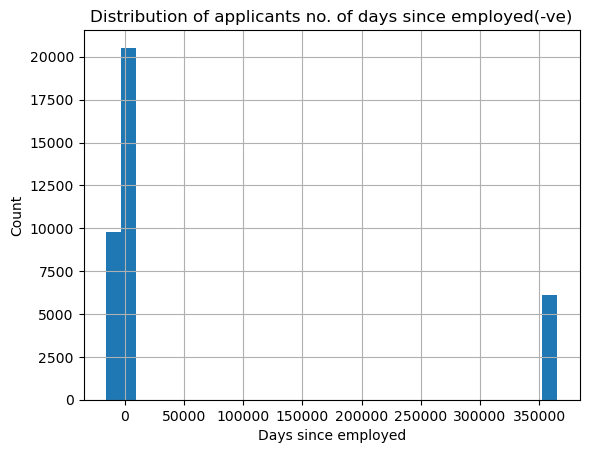

In [52]:
df_applicant.DAYS_EMPLOYED.hist(bins=30)
plt.xlabel('Days since employed')
plt.ylabel('Count')
plt.title('Distribution of applicants no. of days since employed(-ve)');

In [53]:
#To get the details of those outliers. 20000 is a random number assuming for more than 55 years the customer is not working.
df_applicant[df_applicant['DAYS_EMPLOYED']>20000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
7,5008812,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,1,3,0,14,0,0,0,0,0,BAD CUSTOMER
8,5008813,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,1,3,0,14,0,0,0,0,0,BAD CUSTOMER
9,5008814,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,1,3,0,14,0,0,0,0,0,BAD CUSTOMER
69,5008884,F,0,1,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,1,14,23,4,0,0,0,0,0,BAD CUSTOMER
150,5008974,F,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,2,1,0,2,0,0,0,0,0,BAD CUSTOMER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,5126278,F,0,0,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,2,0,5,15,0,3,2,0,4,BAD CUSTOMER
36418,5139446,F,0,1,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,1,1,6,6,3,1,0,0,0,BAD CUSTOMER
36432,5145690,F,0,1,0,306000.0,Pensioner,Higher education,Married,House / apartment,...,2,1,0,4,5,2,1,1,4,BAD CUSTOMER
36434,5145817,F,0,1,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,2,28,0,11,0,0,0,0,1,BAD CUSTOMER


In [54]:
#Assigning null to those invalid values. We are not dropping it now though it has many null values. 
#Keeping it for next steps as sometimes it may be useful.
df_applicant.loc[df_applicant['DAYS_EMPLOYED'] > 20000, 'DAYS_EMPLOYED'] = np.nan

In [55]:
df_applicant['DAYS_EMPLOYED'].describe().T

count    30322.000000
mean     -2645.503694
std       2357.407681
min     -15713.000000
25%      -3505.000000
50%      -1992.000000
75%       -978.000000
max        -17.000000
Name: DAYS_EMPLOYED, dtype: float64

In [56]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   36457 non-null  int64   
 1   CODE_GENDER          36457 non-null  object  
 2   FLAG_OWN_CAR         36457 non-null  int64   
 3   FLAG_OWN_REALTY      36457 non-null  int64   
 4   CNT_CHILDREN         36457 non-null  int64   
 5   AMT_INCOME_TOTAL     36457 non-null  float64 
 6   NAME_INCOME_TYPE     36457 non-null  category
 7   NAME_EDUCATION_TYPE  36457 non-null  object  
 8   NAME_FAMILY_STATUS   36457 non-null  category
 9   NAME_HOUSING_TYPE    36457 non-null  category
 10  DAYS_BIRTH           36457 non-null  int64   
 11  DAYS_EMPLOYED        30322 non-null  float64 
 12  FLAG_MOBIL           36457 non-null  int64   
 13  FLAG_WORK_PHONE      36457 non-null  int64   
 14  FLAG_PHONE           36457 non-null  int64   
 15  FLAG_EMAIL         

In [57]:
df_applicant.shape

(36457, 26)

In [59]:
# save the data to a new csv file
df_applicant.to_csv(
    r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-2\Credit Card Data\Applicant_data_cleaned.csv',
    index=False
)